---
# <div align="center">HỆ THỐNG A.I ĐÁNH GIÁ KPI NHÂN VIÊN NGÂN HÀNG</div>  
---  
### **A. MỤC TIÊU DỰ ÁN**

- **Giảm tỷ lệ khách hàng rời bỏ (churn)**: Chủ động dự đoán khách hàng có khả năng rời bỏ sớm, từ đó đưa ra các chính sách giữ chân kịp thời.

- **Tối ưu chi phí giữ chân khách hàng:** Thay vì dàn trải nguồn lực, ngân hàng tập trung chính xác vào nhóm khách hàng có nguy cơ cao nhất.

- **Nâng cao trải nghiệm khách hàng:** Hiểu rõ yếu tố nào dẫn đến khách hàng rời bỏ, từ đó cải thiện dịch vụ, sản phẩm một cách chính xác và hiệu quả nhất.

- **Gia tăng lợi thế cạnh tranh:** Sử dụng công nghệ (AI/ML) để nhanh chóng phát hiện và phản ứng kịp thời trước biến động hành vi khách hàng, từ đó chiếm ưu thế trước các đối thủ cạnh tranh trên thị trường.
  
### **B. DỮ LIỆU ĐẦU VÀO**
* <ins>**Thông tin khách hàng**<ins>

  * Định danh: CustomerId

  * Nhân khẩu học: Gender, Age

  * Quan hệ với ngân hàng: Tenure (số năm gắn bó)

* <ins>**Hoạt động tài chính**<ins>

 * Điểm tín dụng: CreditScore

 * Số dư tài khoản: Balance

 * Thu nhập ước tính: EstimatedSalary

 * Sản phẩm đang sử dụng: NumOfProducts, HasCrCard

* <ins>**Hành vi sử dụng dịch vụ**<ins>

 * Tần suất đăng nhập: LoginFrequency

 * Giao dịch ra ngoài hệ thống: ExternalTransfers

 * Tình trạng hoạt động: IsActiveMember

* <ins>**Biến mục tiêu (Target)**<ins>

 * Rời bỏ dịch vụ: Exited (1 = đã rời, 0 = chưa)
      
### **C. CƠ SỞ HẠ TẦNG & GIAO DIỆN NGƯỜI DÙNG UI/UX & TÍCH HỢP TỰ ĐỘNG HÓA**
- Phối hợp với các bộ phận khác. Code Python hiện tại chỉ tập trung vào Mô hình: Phương pháp, Thử nghiệm, Đánh giá, Cải thiện

### **D. NỘI DUNG CHÍNH**
* **THIẾT LẬP DỰ ÁN**

* **Tiền xử lý & Feature Engineering**


* **EDA cơ bản**


* **Xây mô hình dự đoán churn**


* **Giải thích mô hình với SHAP**

* **Tạo khoảng tin cậy với MAPIE**

* **Tổng kết nhanh**






---


# **Thiết lâp dự án**

# 1. Load dữ liệu

In [3]:
import pandas as pd

# Đọc file dữ liệu
df = pd.read_excel("/content/BankingDataset.xlsx")

# Hiển thị 5 dòng đầu tiên
df.head()


,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,LoginFrequency,ExternalTransfers,Exited
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,30,52,1
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,19,24,0
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,44,65,1
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,24,17,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,25,42,0




---


# 2. Kiểm tra định dạng dữ liệu , shape , missing value

In [4]:
# Kiểm tra số dòng, cột
print("Shape:", df.shape)

# Xem thông tin kiểu dữ liệu, non-null
df.info()


Shape: (10000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  LoginFrequency     10000 non-null  int64  
 11  ExternalTransfers  10000 non-null  int64  
 12  Exited             10000 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 1015.8+ KB


In [5]:
# Tính tỉ lệ thiếu trên mỗi cột
missing_ratio = df.isnull().mean().sort_values(ascending=False)

# Hiển thị các cột có giá trị thiếu
missing_ratio[missing_ratio > 0]


,0




---


# **TIỀN XỬ LÝ DỮ LIỆU VÀ FEATURE ENGINEER**



---


# 1. Mapping biến phân loại ( Gender )

In [6]:
import json

gender_map = {"Male": 1, "Female": 0}
df["Gender"] = df["Gender"].map(gender_map)

with open("gender_map.json", "w") as f:
    json.dump(gender_map, f)



---


# 2. Feature Engineering

---

Tạo ra các biến mới từ các biến gốc để mô hình có thêm “góc nhìn” mới về hành vi khách hàng :
 - Ý tưởng: Nếu khách có số dư cao nhưng chỉ dùng ít sản phẩm → tiềm năng chưa khai thác hết → có thể là dấu hiệu churn.
 - So sánh giữa thời gian khách hàng gắn bó và tần suất tương tác → khách gắn bó lâu nhưng ít login → có nguy cơ bỏ đi.
 -  Một khách hàng trẻ nhưng có thu nhập cao có thể được ưu tiên hơn → mô hình học được sự khác biệt giữa "khách VIP tiềm năng" và khách thường.
 - Login nhiều nhưng ít chuyển khoản → có thể chỉ truy cập xem, không thật sự tương tác tài chính.
  
  Dùng để phân loại hành vi “ngó chơi” vs “giao dịch thật”.



In [7]:
df["BalancePerProduct"] = df["Balance"] / (df["NumOfProducts"] + 1)
df["ActivityPerTenure"] = df["LoginFrequency"] / (df["Tenure"] + 1)
df["SalaryPerAge"] = df["EstimatedSalary"] / (df["Age"] + 1)
df["TransferLoginRatio"] = df["ExternalTransfers"] / (df["LoginFrequency"] + 1)

# **EDA CƠ BẢN**

In [8]:
df.head(5)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,LoginFrequency,ExternalTransfers,Exited,BalancePerProduct,ActivityPerTenure,SalaryPerAge,TransferLoginRatio
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,30,52,1,0.00,10.000000,2356.950698,1.677419
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,19,24,0,41903.93,9.500000,2679.585238,1.200000
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,44,65,1,39915.20,4.888889,2649.571395,1.444444
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,24,17,0,0.00,12.000000,2345.665750,0.680000
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,25,42,0,62755.41,8.333333,1797.365909,1.615385




---


# 1. Check phân thông số và phân vị các cột để biết có cần lọc outlier hay không

In [9]:
df.describe()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,LoginFrequency,ExternalTransfers,Exited,BalancePerProduct,ActivityPerTenure,SalaryPerAge,TransferLoginRatio
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,32.388000,32.220500,0.203700,33603.672464,7.786626,2673.233641,1.276829
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,13.292845,16.289433,0.402769,28665.633080,7.465067,1725.204591,1.197141
min,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,5.000000,1.000000,0.000000,0.000000,0.454545,0.251739,0.014493
25%,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,22.000000,20.000000,0.000000,0.000000,3.454545,1281.816189,0.545455
50%,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,32.000000,31.000000,0.000000,38452.862500,5.428571,2473.177448,0.958759
75%,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,42.000000,43.000000,0.000000,57167.393750,9.297619,3866.862444,1.580645
max,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,81.000000,91.000000,1.000000,119193.780000,70.000000,10385.375263,12.000000




---


# 2. Các cột được lựa chọn để xử lý outlier


---


In [10]:
# Các cột cần xử lý outlier
feature_engineered = [
    "BalancePerProduct",
    "ActivityPerTenure",
    "SalaryPerAge",
    "TransferLoginRatio"
]

# Tạo log để theo dõi số dòng bị clip
outlier_log = {}

for col in feature_engineered:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    before = df[col].copy()
    df[col] = df[col].clip(lower, upper)

    clipped = ((before < lower) | (before > upper)).sum()
    outlier_log[col] = clipped

# In log kết quả
for col, clipped in sorted(outlier_log.items(), key=lambda x: x[1], reverse=True):
    print(f"{col:25s} → {clipped} dòng bị clip")


ActivityPerTenure         → 772 dòng bị clip
TransferLoginRatio        → 642 dòng bị clip
SalaryPerAge              → 43 dòng bị clip
BalancePerProduct         → 0 dòng bị clip


# 3. Vẽ biểu đồ phân phối để quan sát dữ liệu sau khi cắt outlier

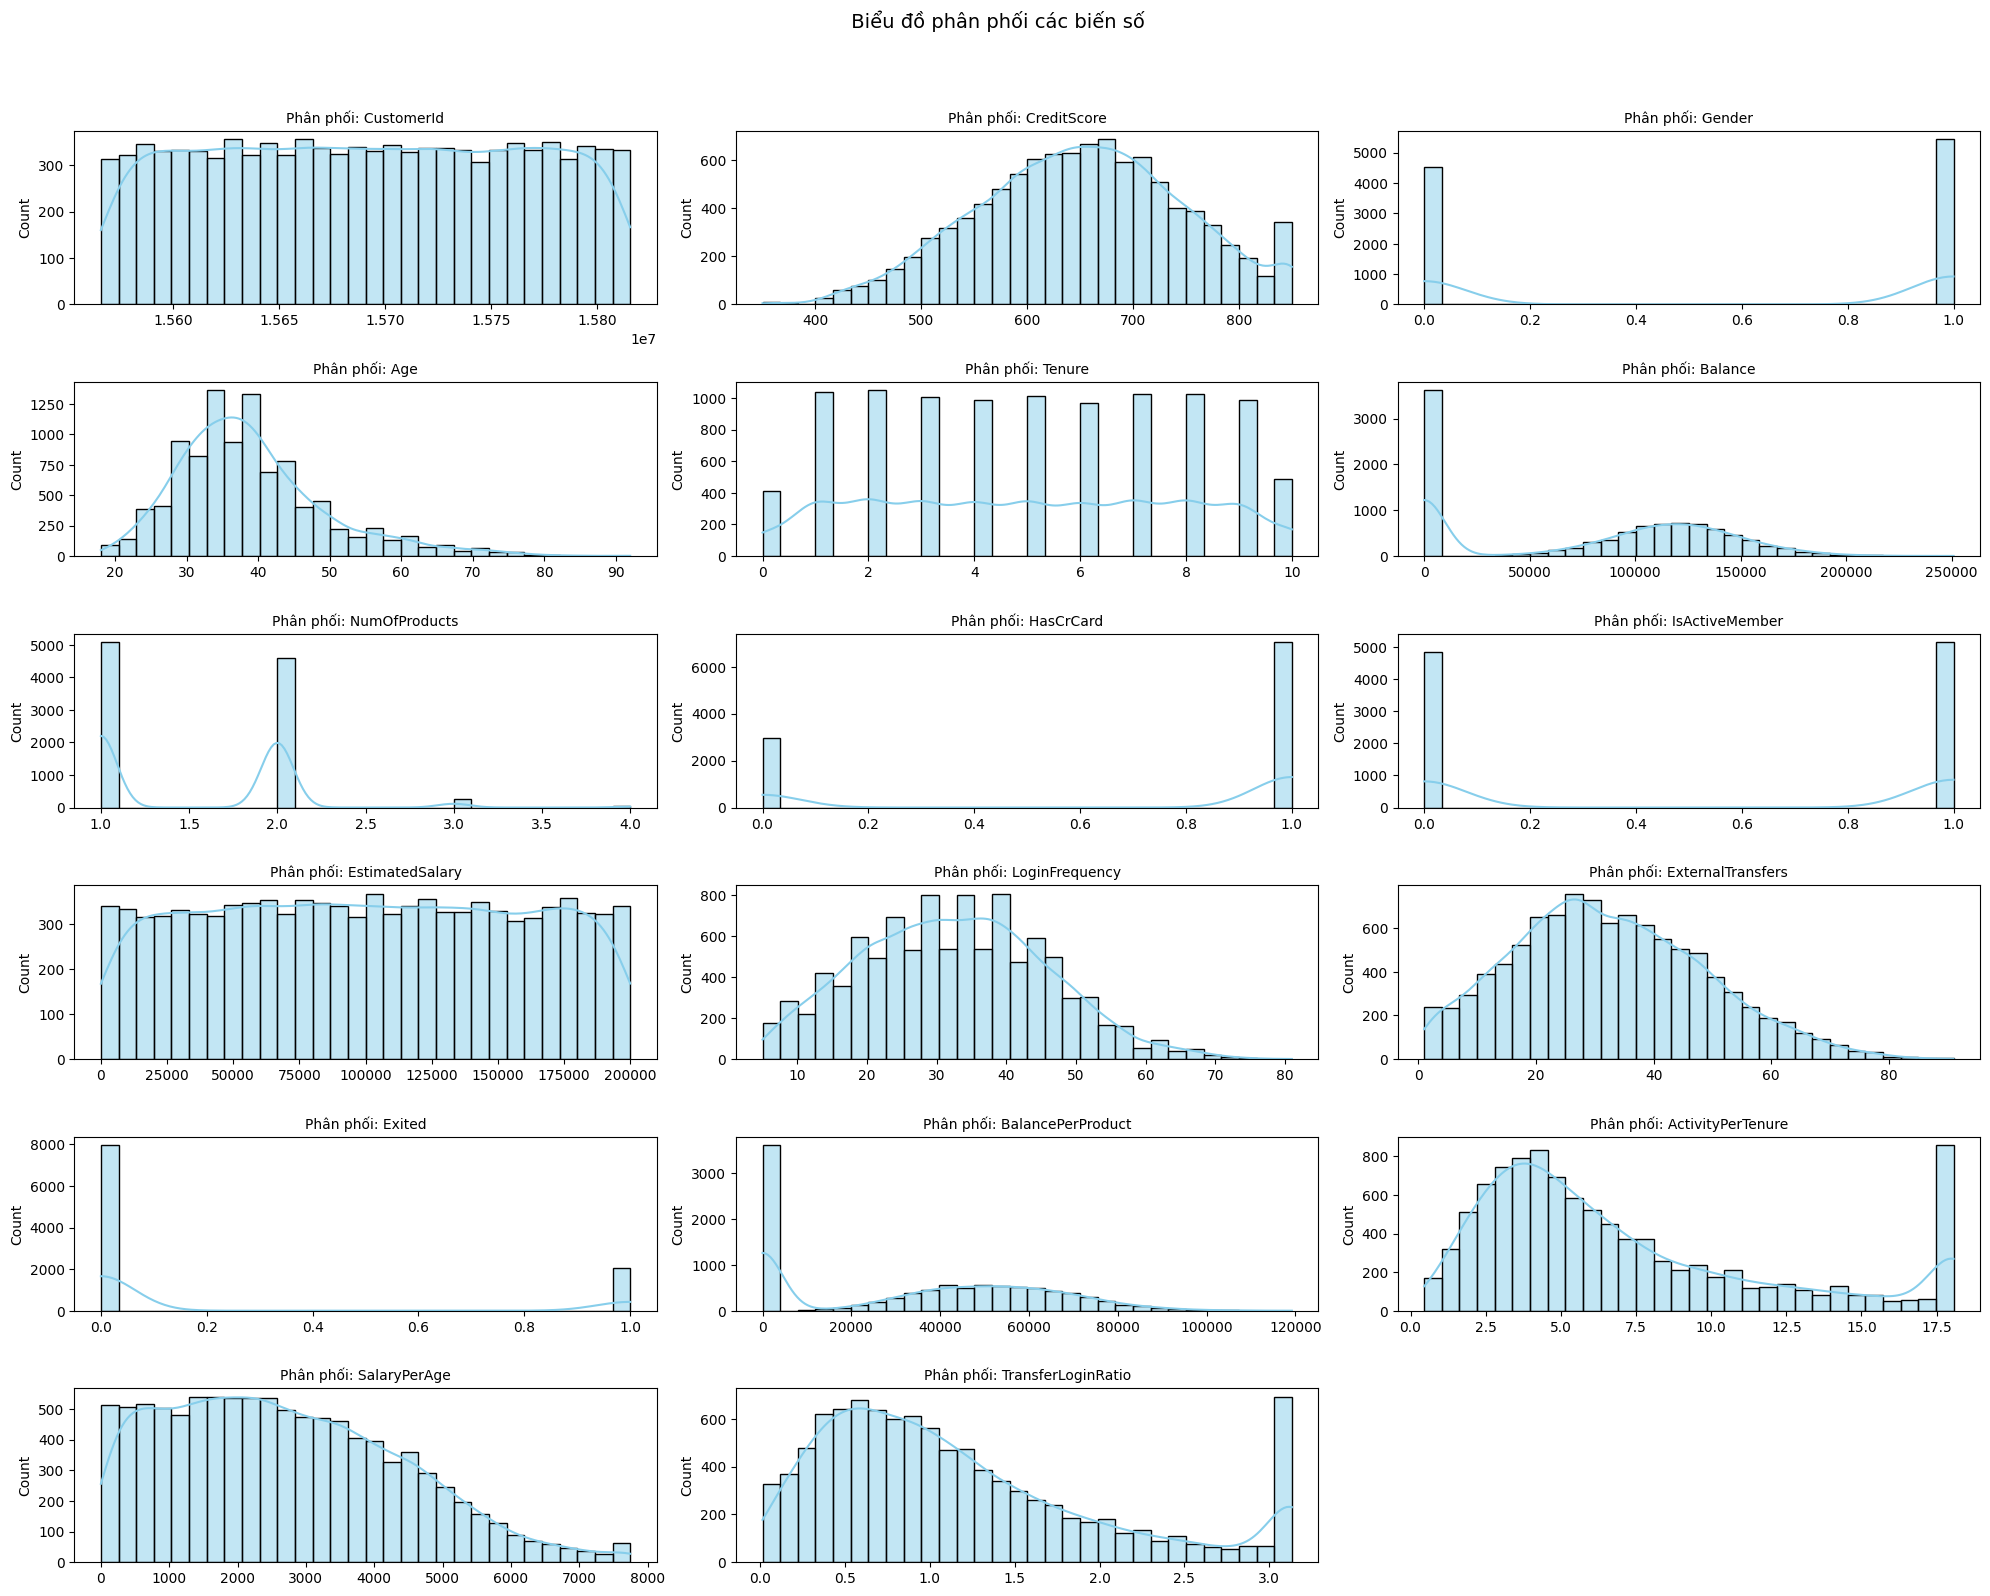

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chỉ lấy các cột dạng số (loại bỏ ID / string / object)
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot
plt.figure(figsize=(20, len(numeric_cols) * 2.5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 3, i)
    sns.histplot(data=df, x=col, bins=30, kde=True, color='skyblue')
    plt.title(f"Phân phối: {col}", fontsize=10)
    plt.xlabel("")
    plt.tight_layout()

plt.suptitle(" Biểu đồ phân phối các biến số", fontsize=14, y=1.02)
plt.show()




---


# **Kiểm tra tương quan giữa các biến**


---

 - Dùng ma trận tương quan để kiểm tra và lọc các biến có độ tương quan quá lớn với nhau
 - Mutual Infomation (Thông tin tương hỗ) : Để check tương quan giữa các biến với đầu ra ( Exited )

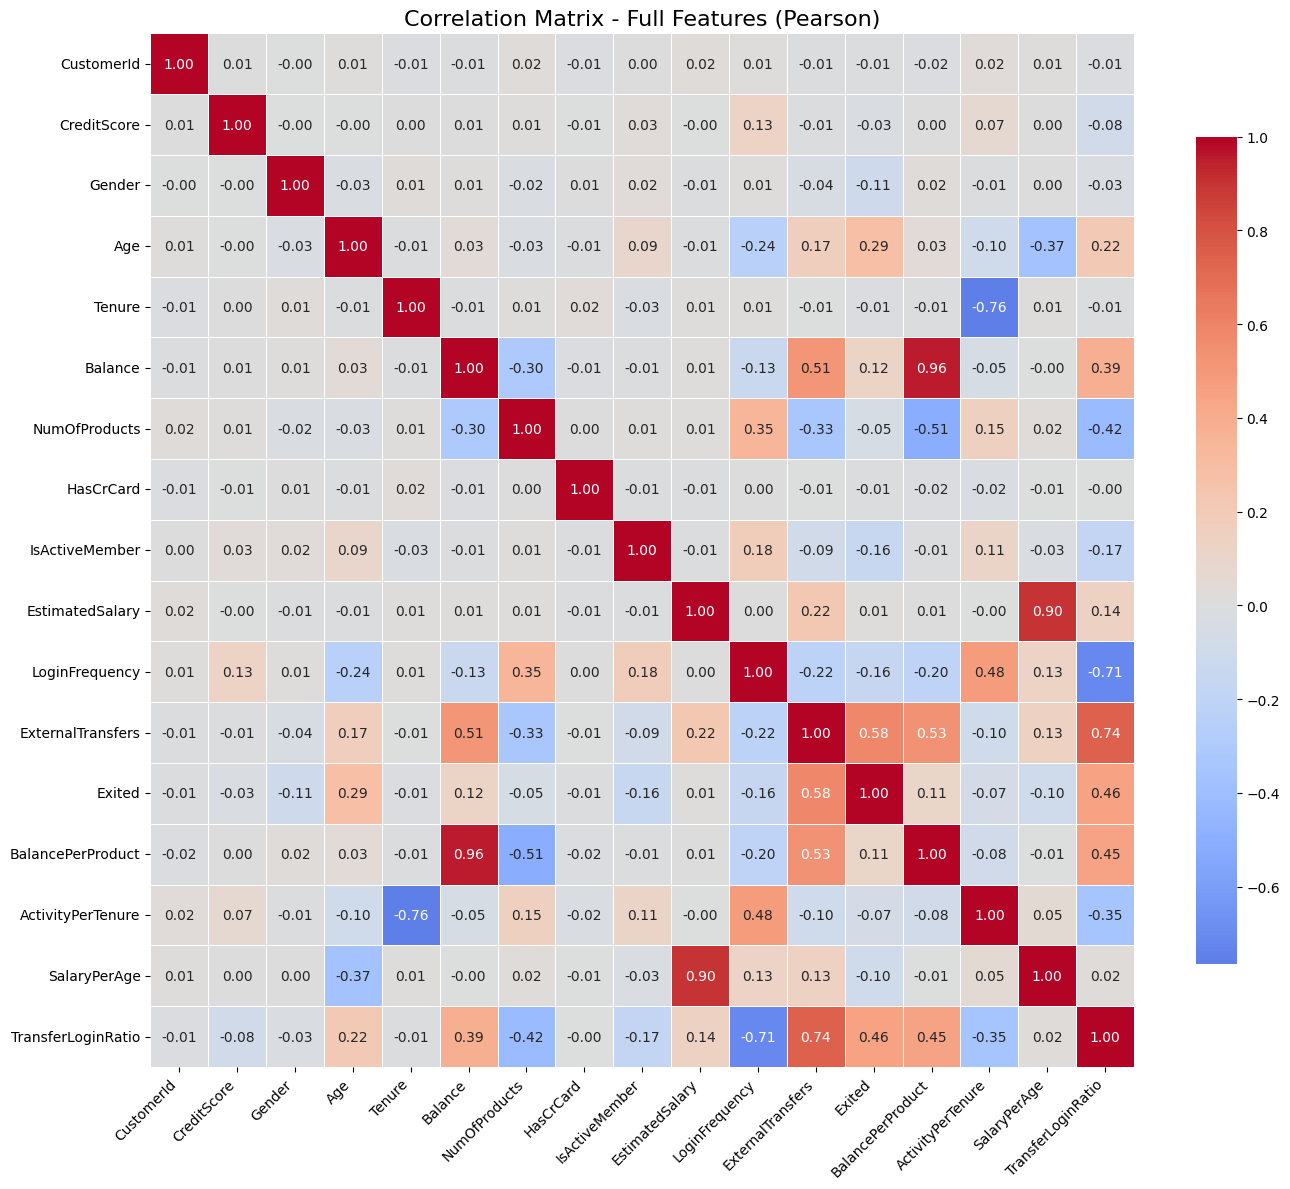

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính hệ số tương quan Pearson
corr_matrix = df.corr(numeric_only=True)

# Vẽ heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix - Full Features (Pearson)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


ExternalTransfers     0.201772
TransferLoginRatio    0.140327
NumOfProducts         0.069883
Age                   0.068234
ActivityPerTenure     0.013294
BalancePerProduct     0.013096
SalaryPerAge          0.011963
LoginFrequency        0.011355
IsActiveMember        0.010155
Balance               0.004984
CreditScore           0.004622
Tenure                0.004586
Gender                0.003887
EstimatedSalary       0.002704
HasCrCard             0.000000
CustomerId            0.000000
dtype: float64


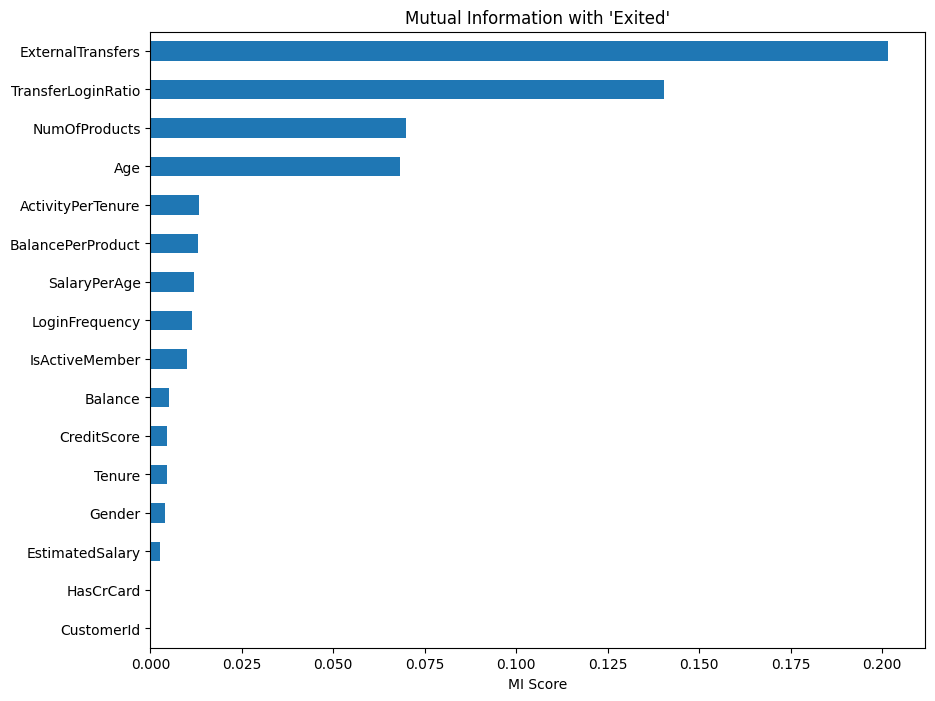

In [13]:
from sklearn.feature_selection import mutual_info_classif

X_all = df.drop(columns="Exited")
y_all = df["Exited"]

mi_scores = mutual_info_classif(X_all.fillna(0), y_all, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X_all.columns).sort_values(ascending=False)

# Hiển thị top features
print(mi_series)

# Plot MI scores
mi_series.plot(kind='barh', figsize=(10, 8))
plt.title("Mutual Information with 'Exited'")
plt.xlabel("MI Score")
plt.gca().invert_yaxis()
plt.show()




---


# **Xây dựng mô hình dự đoán Churn**



---


# 1. Chọn các biến đầu vào dựa theo Ma trận tương quan và Mutual Infomation

In [28]:
selected_features = [
    "ExternalTransfers",
    "TransferLoginRatio",
    "NumOfProducts",
    "Age",
    "IsActiveMember",
    "BalancePerProduct",
    "ActivityPerTenure",
    "SalaryPerAge"
]



---


 #  2. Chia dữ liệu huẩn luyện

---



  2.1 Tách test set trước – 20%

    - X_test, y_test sẽ là tập test cuối cùng – chỉ dùng sau cùng để đánh giá mô hình đã huấn luyện.

    - Dùng stratify=y để đảm bảo tỉ lệ churn (Exited = 1) trong tập test giống với toàn bộ tập dữ liệu, tránh bị lệch.

    - random_state=42 để tái lập kết quả.

   2.2. Tách Calibration set – 10% của tổng, tương đương 12.5% phần còn lại

    - X_calib, y_calib: Tập calibration – dùng để tạo ra khoảng tin cậy trong dự đoán (sử dụng thư viện MAPIE).

    - X_train, y_train: Tập huấn luyện chính.

    - Vì tách 12.5% của phần còn lại (80% dữ liệu ban đầu), nên:

      - X_train = 70%

      - X_calib = 10%

      - X_test = 20%



In [29]:
from sklearn.model_selection import train_test_split

# Lấy input đầu vào
X = df[selected_features]
y = df["Exited"]

# 1. Tách test trước (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Tách calib từ phần còn lại (10% → 12.5% của X_temp)
X_train, X_calib, y_train, y_calib = train_test_split(
    X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=42
)


# **Machine Learning**

## Trong dự án này, tôi đã triển khai 3 mô hình classification chính để dự đoán churn:

- Random Forest (RF)

- XGBoost

- LightGBM

Các mô hình này:

 - Không cần scale dữ liệu

 - Xử lý tốt các mối quan hệ phi tuyến

 - Chịu được noise và feature dư thừa

Ngoài ra:

 - Với dữ liệu mất cân bằng (Exited = 1 chỉ ~20%), đã sử dụng tham số:

 - class_weight='balanced' cho RF và LGBM

 - scale_pos_weight cho XGBoost

In [30]:
!pip install shap -U

## 1. Xây dựng mô hình học máy

# **Random Forrest**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
rf_model = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [33]:
y_pred = rf_model.predict(X_test)
print(" Đánh giá Random Forest:")
print(classification_report(y_test, y_pred, digits=4))

 Đánh giá Random Forest:
              precision    recall  f1-score   support

           0     0.9270    0.9799    0.9527      1593
           1     0.8987    0.6978    0.7856       407

    accuracy                         0.9225      2000
   macro avg     0.9128    0.8389    0.8692      2000
weighted avg     0.9212    0.9225    0.9187      2000



In [34]:
import joblib

# Lưu model
joblib.dump(rf_model, "rf_model_final.pkl")
print(" Đã lưu model RF → rf_model_final.pkl")


 Đã lưu model RF → rf_model_final.pkl


# **XGBoost**

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Tính scale_pos_weight (tỷ lệ class 0 / class 1)
scale_weight = y_train.value_counts()[0] / y_train.value_counts()[1]


In [36]:
xgb_model = XGBClassifier(
    n_estimators=500,
    scale_pos_weight=scale_weight,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [37]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print(" Đánh giá XGBoost:")
print(classification_report(y_test, y_pred_xgb, digits=4))

 Đánh giá XGBoost:
              precision    recall  f1-score   support

           0     0.9374    0.9680    0.9524      1593
           1     0.8563    0.7469    0.7979       407

    accuracy                         0.9230      2000
   macro avg     0.8969    0.8575    0.8752      2000
weighted avg     0.9209    0.9230    0.9210      2000



In [38]:
import joblib
joblib.dump(xgb_model, "xgb_model_final.pkl")
print("✅ Đã lưu model → xgb_model_final.pkl")


✅ Đã lưu model → xgb_model_final.pkl


# **LightGBM**

In [39]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report


# Train LightGBM
lgb_model = LGBMClassifier(
    n_estimators=500,
    class_weight='balanced',
    random_state=42
)

lgb_model.fit(X_train, y_train)



[LightGBM] [Info] Number of positive: 1426, number of negative: 5574
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1155
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', n_estimators=500, random_state=42)

In [40]:
# Predict trên test
y_pred_lgb = lgb_model.predict(X_test)

# Đánh giá
print(" Đánh giá LightGBM:")
print(classification_report(y_test, y_pred_lgb, digits=4))

 Đánh giá LightGBM:
              precision    recall  f1-score   support

           0     0.9405    0.9730    0.9565      1593
           1     0.8778    0.7592    0.8142       407

    accuracy                         0.9295      2000
   macro avg     0.9092    0.8661    0.8854      2000
weighted avg     0.9278    0.9295    0.9275      2000



In [41]:
import joblib
joblib.dump(lgb_model, "lgb_model_final.pkl")
print("✅ Đã lưu LightGBM → lgb_model_final.pkl")


✅ Đã lưu LightGBM → lgb_model_final.pkl


# 2. Thông số sử dụng
###   Accuracy (Độ chính xác tổng thể)

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

**Ý nghĩa:**  
- Tỷ lệ dự đoán đúng (churn và không churn) trên toàn bộ mẫu.

**Nhược điểm:**  
 - Không đáng tin khi dữ liệu mất cân bằng.  
**VD:** *nếu chỉ 20% khách hàng churn, đoán tất cả đều không churn cũng được 80% accuracy → tưởng tốt nhưng thực ra tệ*.

**Khi nào dùng:**  
 - Chỉ dùng để tham khảo chung. Không nên là chỉ số chính khi tỷ lệ churn < 50%.

---

###   Precision (Độ chính xác dương tính)

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Ý nghĩa:**  
- Trong số khách hàng được **dự đoán sẽ rời bỏ**, bao nhiêu người **thực sự sẽ rời**?

**Ví dụ:**  
- Nếu Precision = 0.85 → trong 100 khách bị báo là sẽ churn, có 85 người thật sự sẽ đi.

**Khi nào dùng:**  
- Quan trọng khi chi phí xử lý khách nhầm cao.  
- Nhưng nếu Precision cao mà Recall thấp thì mô hình "chơi an toàn", chỉ báo churn khi rất chắc → bỏ sót nhiều khách thật sự rời đi.

---

###   Recall (Độ nhạy)

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Ý nghĩa:**  
- Trong số khách hàng **thực sự rời bỏ**, mô hình **bắt được bao nhiêu**?

**Ví dụ:**  
- Nếu Recall = 0.90 → có 100 người thật sự sẽ rời, mô hình bắt được 90 người.

**Khi nào dùng:**  
 Rất quan trọng trong dự án churn vì:
- Bỏ sót khách sắp rời là **mất tiền thật**.
- Dự đoán sai còn xử lý được (ví dụ gọi điện hỏi thăm), nhưng bỏ qua thì mất luôn.

### 4. F1-Score (Chỉ số cân bằng Precision và Recall)

$$
\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Ý nghĩa:**  
F1-score là chỉ số tổng hợp giữa độ chính xác (Precision) và độ nhạy (Recall).  
Nếu một trong hai thấp, F1 sẽ phản ánh điều đó. F1-score là thước đo tốt khi cần cân bằng giữa việc tránh bỏ sót và tránh báo nhầm.

**Khi nào sử dụng:**  
- Khi dự án yêu cầu mô hình phải bắt được đúng khách hàng rời bỏ nhưng cũng hạn chế báo nhầm.  
- Thích hợp với các bài toán như churn prediction, fraud detection, medical diagnosis.

---



**Sau khi tính Precision, Recall, F1-score cho từng lớp (class 0: không rời, class 1: rời), ta cần tổng hợp kết quả chung. sklearn cung cấp hai dạng trung bình:**

#### Macro Average

**Cách tính:**  
Tính trung bình cộng của chỉ số trên tất cả các lớp mà **không xét đến tỉ lệ số lượng** giữa các lớp.

Ví dụ cho F1-score:

$$
\text{F1}_{macro} = \frac{\text{F1}_{class\ 0} + \text{F1}_{class\ 1}}{2}
$$

**Ý nghĩa:**  
- Đánh giá mô hình công bằng giữa các lớp.
- Phù hợp khi cần mô hình thể hiện tốt cho **cả hai lớp**, dù dữ liệu mất cân bằng.

#### Weighted Average

**Cách tính:**  
Tính trung bình cộng có trọng số, trọng số là số lượng mẫu tương ứng ở mỗi lớp.

Ví dụ cho F1-score:

$$
\text{F1}_{weighted} = \frac{\text{F1}_0 \cdot N_0 + \text{F1}_1 \cdot N_1}{N_0 + N_1}
$$

**Ý nghĩa:**  
- Phản ánh đúng hiệu suất tổng thể của mô hình trên toàn bộ dữ liệu.
- Tuy nhiên có thể **che khuất điểm yếu của mô hình ở lớp thiểu số**, do lớp đông hơn chiếm nhiều trọng số.

---

### Lưu ý khi áp dụng cho bài toán churn prediction:

- `Recall` và `F1-score` của lớp **Exited = 1** (khách hàng rời) là chỉ số quan trọng nhất.
- `Macro average` giúp đánh giá xem mô hình có đang thiên lệch không.
- `Weighted average` chỉ nên dùng để đánh giá tổng thể, không phản ánh chính xác hiệu quả của mô hình trên lớp churn (nếu mất cân bằng).



# **So sánh mô hình**

- Dựa vào bộ chỉ số đầu ra và ma trận nhầm lẫn của các mô hình ta có thể so sánh và chọn ra mô hình sẽ tích hợp SHAP và MAPIE để đưa vào hệ thống sau cùng.

In [42]:
# Load tất cả các mô hình đã huấn luyện
rf_model = joblib.load('rf_model_final.pkl')
xgb_model = joblib.load('xgb_model_final.pkl')
lgb_model = joblib.load('lgb_model_final.pkl')



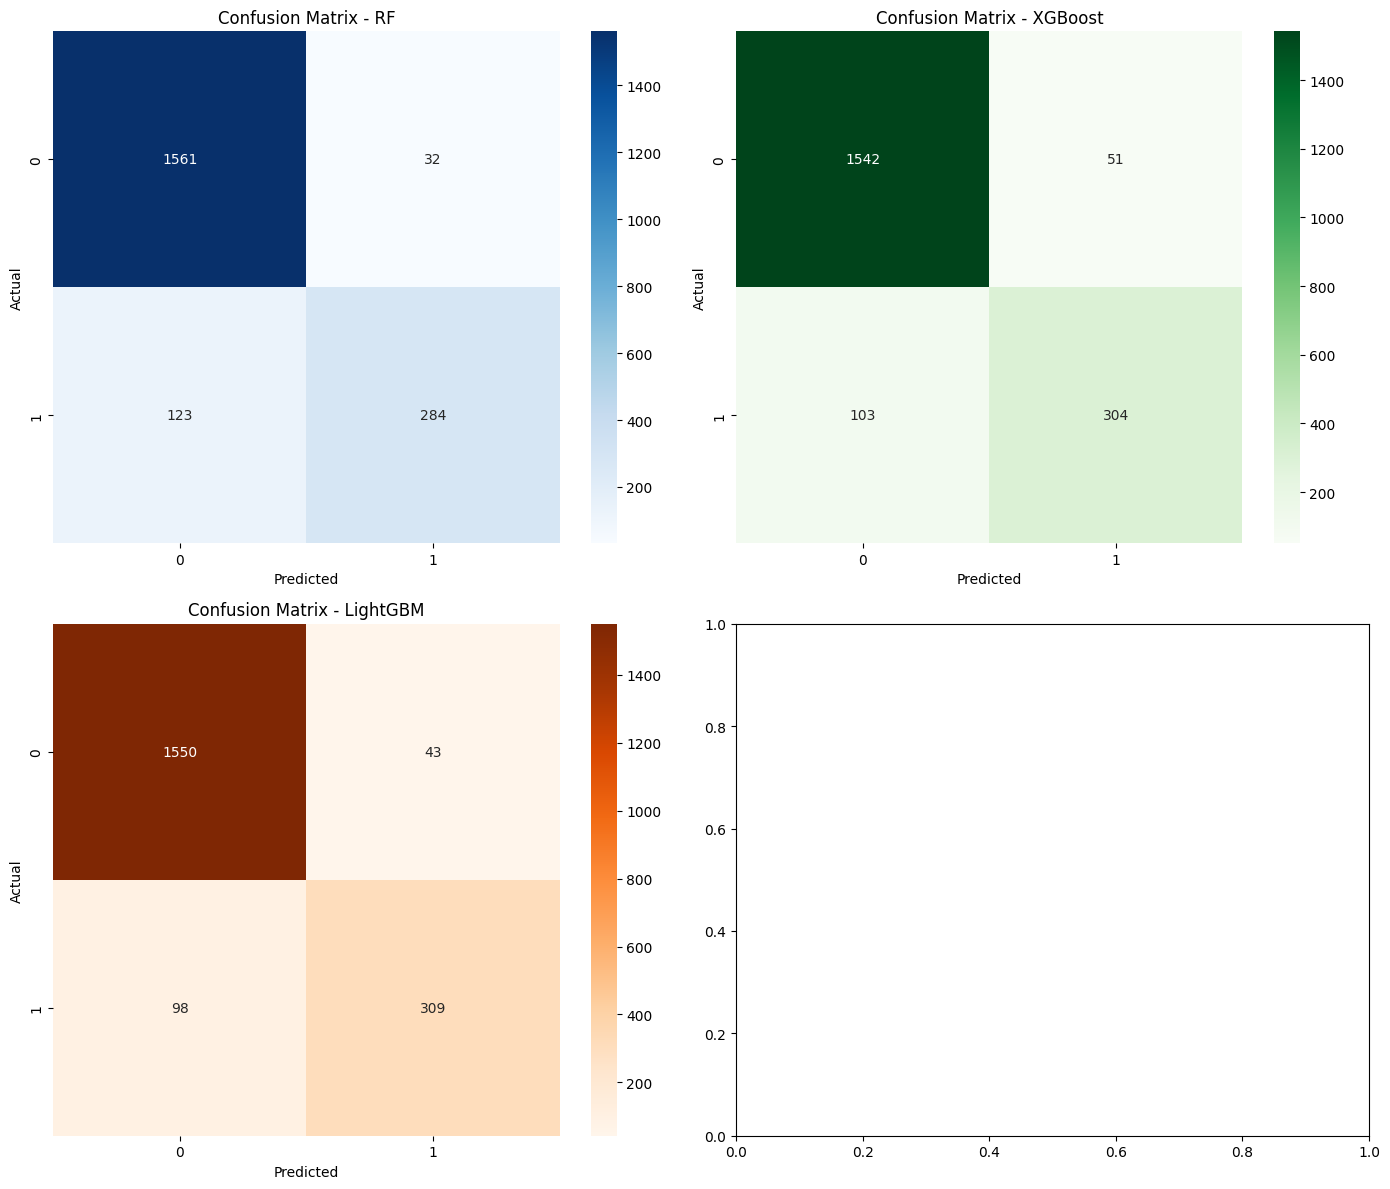

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dự đoán từ các mô hình
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)

# Vẽ Confusion Matrix cho mỗi mô hình
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title("Confusion Matrix - RF")
axs[0, 0].set_xlabel("Predicted")
axs[0, 0].set_ylabel("Actual")

# XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axs[0, 1])
axs[0, 1].set_title("Confusion Matrix - XGBoost")
axs[0, 1].set_xlabel("Predicted")
axs[0, 1].set_ylabel("Actual")

# LightGBM
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Oranges', ax=axs[1, 0])
axs[1, 0].set_title("Confusion Matrix - LightGBM")
axs[1, 0].set_xlabel("Predicted")
axs[1, 0].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [44]:
# Create classification report for each model
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_lgb = classification_report(y_test, y_pred_lgb, output_dict=True)

# Convert each classification report into a DataFrame
df_rf = pd.DataFrame(report_rf).T
df_xgb = pd.DataFrame(report_xgb).T
df_lgb = pd.DataFrame(report_lgb).T

# Combine the DataFrames for comparison
df_comparison = pd.concat([df_rf[['precision', 'recall', 'f1-score']],
                           df_xgb[['precision', 'recall', 'f1-score']],
                           df_lgb[['precision', 'recall', 'f1-score']]],
                          axis=1)

# Rename the columns for clarity
df_comparison.columns = ['RF - Precision', 'RF - Recall', 'RF - F1-Score',
                         'XGBoost - Precision', 'XGBoost - Recall', 'XGBoost - F1-Score',
                         'LightGBM - Precision', 'LightGBM - Recall', 'LightGBM - F1-Score']

# Display the comparison table directly in Colab
df_comparison


,RF - Precision,RF - Recall,RF - F1-Score,XGBoost - Precision,XGBoost - Recall,XGBoost - F1-Score,LightGBM - Precision,LightGBM - Recall,LightGBM - F1-Score
0,0.926960,0.979912,0.952701,0.937386,0.967985,0.952440,0.940534,0.973007,0.956495
1,0.898734,0.697789,0.785615,0.856338,0.746929,0.797900,0.877841,0.759214,0.814229
accuracy,0.922500,0.922500,0.922500,0.923000,0.923000,0.923000,0.929500,0.929500,0.929500
macro avg,0.912847,0.838850,0.869158,0.896862,0.857457,0.875170,0.909187,0.866110,0.885362
weighted avg,0.921216,0.922500,0.918699,0.920893,0.923000,0.920991,0.927776,0.929500,0.927544


# **SHAP**

1. SHAP là gì và tại sao cần dùng?
SHAP (SHapley Additive exPlanations) là một phương pháp giúp giải thích đầu ra của mô hình Machine Learning. Nó trả lời câu hỏi:

 - “Tại sao mô hình dự đoán khách hàng này sẽ rời bỏ?”

 - Thay vì chỉ biết một con số xác suất churn, SHAP giúp chúng ta thấy được các yếu tố nào đang kéo xác suất đó lên hoặc xuống, giúp mô hình trở nên minh bạch và dễ tin hơn với người dùng kinh doanh.

2. Ứng dụng trong dự án Churn Prediction
Trong dự án này, chúng tôi áp dụng SHAP để:

 - Giải thích các yếu tố ảnh hưởng đến từng quyết định dự đoán churn.

 - Trực quan hóa vai trò của từng biến đầu vào.

 - Tạo sự minh bạch, tăng độ tin tưởng từ phía khách hàng và phòng kinh doanh.



In [34]:
pip install --upgrade shap


In [45]:
import joblib
import json
import os

# Tạo thư mục nếu chưa có
os.makedirs("models", exist_ok=True)

# SAVE feature list đúng thứ tự cột lúc train
with open("models/feature_list.json", "w") as f:
    json.dump(list(X_train.columns), f)


In [46]:
import shap
import joblib
import json

# Load model
model = joblib.load("/content/lgb_model_final.pkl")

# Load feature list để đảm bảo đúng thứ tự
with open("/content/models/feature_list.json") as f:
    feature_list = json.load(f)

# Đảm bảo X_test đúng thứ tự cột
X_test = X_test[feature_list]

# Tạo explainer cho tree model
explainer = shap.TreeExplainer(model)

# Tính SHAP values
shap_values = explainer.shap_values(X_test)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(




---


# SHAP Bar Plot (Feature Importance tổng thể)

---


- Trung bình độ ảnh hưởng của mỗi biến đến dự đoán trên toàn bộ khách hàng.

  - Từ biểu đồ ta thấy ExternalTransfers có tác động lớn nhất đến mô hình.

  - Tiếp theo là BalancePerProduct, SalaryPerAge, Age, v.v.

- Ý nghĩa:
  - Giúp team kinh doanh hiểu biến nào đang thực sự quan trọng với mô hình – từ đó tập trung cải thiện/thu thập thêm thông tin cho các biến này.




---
# SHAP Summary Plot (Violin plot)


---

- Kết hợp giữa giá trị biến và mức độ ảnh hưởng để thấy xu hướng hành vi toàn bộ hệ thống.


- Trục ngang: SHAP value (mức độ ảnh hưởng).

- Màu sắc: Giá trị của feature (Xanh: thấp, Hồng: cao).

- Ví dụ phân tích:

  - Với ExternalTransfers: giá trị thấp (xanh) thường kéo SHAP về âm → khả năng rời đi tăng cao khi ít giao dịch ra ngoài.

  - Với BalancePerProduct: giá trị thấp cũng thường đẩy dự đoán lên → tức là khách có tài khoản nhưng không dùng sản phẩm có khả năng rời cao.

- Ý nghĩa:
  - Cho thấy mối quan hệ logic giữa hành vi và churn trên toàn hệ thống. Điều này giúp validate mô hình, đảm bảo mô hình "nghĩ đúng".


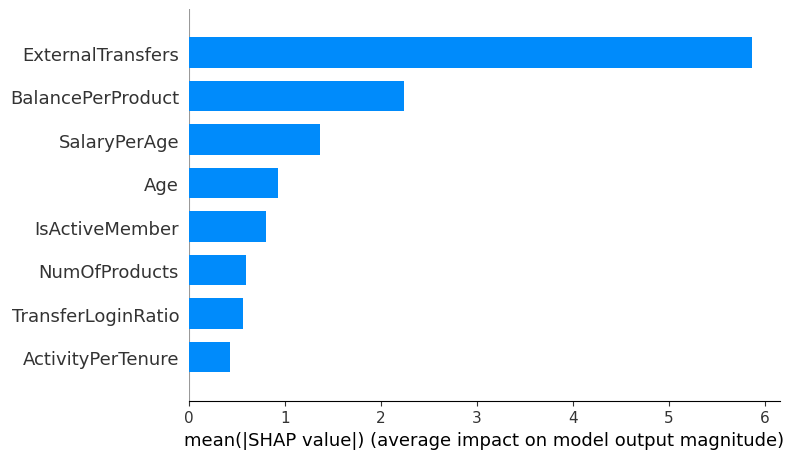

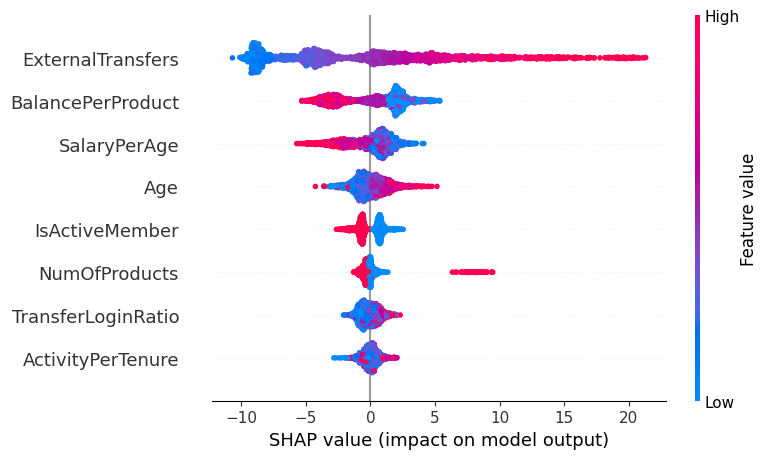

In [47]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)



---


# Force Barplot

---

 Force plot (SHAP Decision Explanation)
 - Mỗi biểu đồ là một cá nhân – mô hình đã quyết định họ rời hay không, và SHAP cho thấy lý do.

  - Màu đỏ: Các biến làm tăng khả năng rời bỏ.

  - Màu xanh: Các biến làm giảm khả năng rời bỏ.

Trục ngang thể hiện mức độ ảnh hưởng (âm hay dương) tới đầu ra mô hình.

- Ví dụ giải thích:

  - ExternalTransfers = 13 làm giảm mạnh khả năng rời bỏ → khách này giao dịch ra ngoài nhiều, có thể vẫn đang tương tác tích cực.

  - BalancePerProduct = 0 làm tăng khả năng rời bỏ → khách có tài khoản nhưng không sử dụng sản phẩm → tiềm năng rời đi cao.

 ⟶ Giúp nhân viên CSKH hiểu lý do tại sao hệ thống đánh giá như vậy, từ đó hành động đúng hướng.





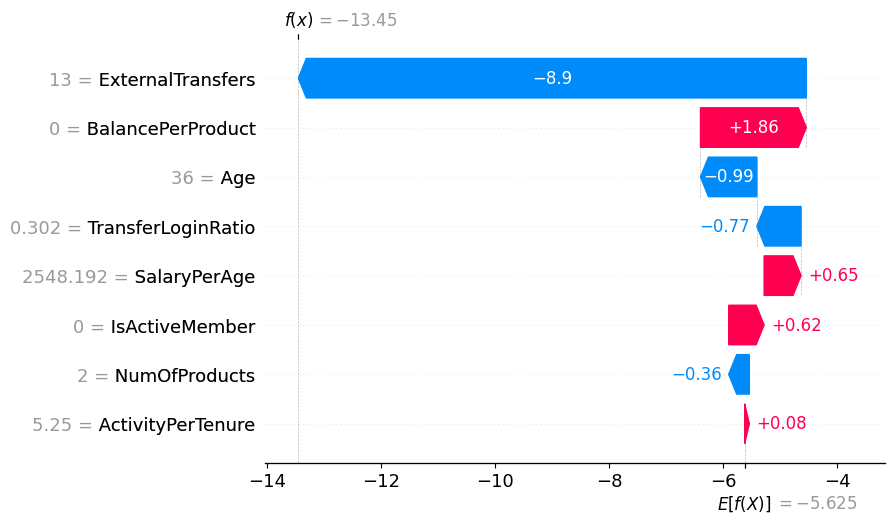

In [48]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_test.iloc[0]
))

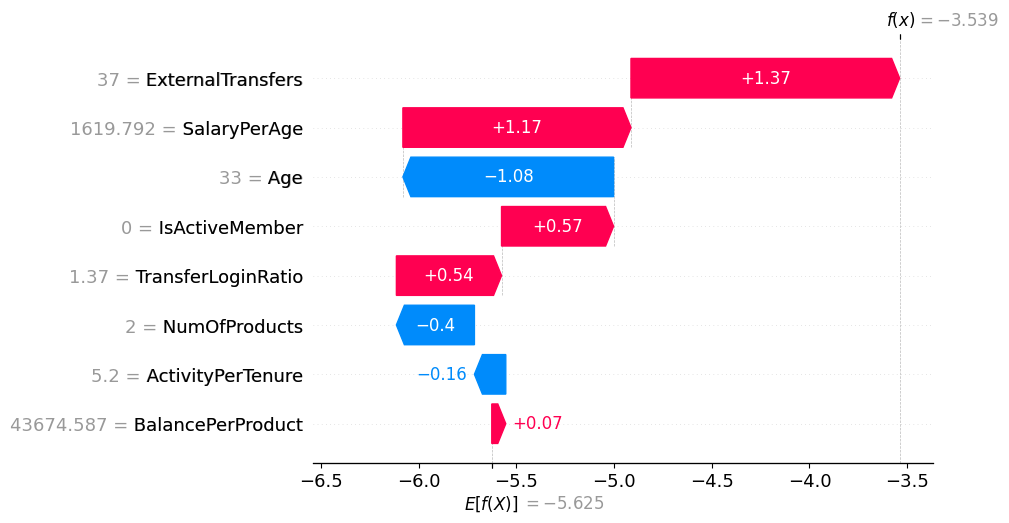

In [49]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values[1],
    base_values=explainer.expected_value,
    data=X_test.iloc[1]
))

---
## Giải thích các chỉ số trong SHAP Force Plot

---



SHAP force plot là biểu đồ trực quan mô tả lý do tại sao mô hình đưa ra một dự đoán cụ thể cho từng khách hàng. Dưới đây là các thành phần chính trong biểu đồ:


### 1. `f(x)` – Giá trị đầu ra của mô hình

$$
f(x) = \text{logit score}
$$

- Là giá trị đầu ra (log-odds) của mô hình cho một cá nhân cụ thể.
- Được dùng để tính xác suất bằng hàm sigmoid:

$$
\text{Probability} = \frac{1}{1 + e^{-f(x)}}
$$

- Nếu `f(x)` rất âm → xác suất churn thấp. Nếu `f(x)` dương → xác suất churn cao.

**Ví dụ:**  
`f(x) = -13.45` → xác suất churn gần bằng 0%.

---

### 2. `E[f(X)]` – Giá trị trung bình mô hình

- Là giá trị đầu ra trung bình của mô hình trên toàn bộ tập dữ liệu huấn luyện.
- Là điểm khởi đầu cho mọi dự đoán trước khi thêm ảnh hưởng của từng biến.

**Ý nghĩa:**  
Nếu không có thông tin gì về khách hàng, mô hình mặc định dự đoán bằng `E[f(X)]`.

**Ví dụ:**  
`E[f(X)] = -5.625` → baseline của toàn bộ hệ thống.

---

### 3. Các mũi tên (các biến đầu vào)

- **Màu đỏ:** Biến này đang **làm tăng xác suất churn**.
- **Màu xanh:** Biến này đang **giảm xác suất churn**.
- **Chiều dài mũi tên:** Mức độ ảnh hưởng của biến đó.

**Ví dụ:**  
- `ExternalTransfers = 13 → -8.9`  
Khách chuyển tiền ra ngoài nhiều → được coi là đang hoạt động tích cực → giảm mạnh khả năng churn.

- `BalancePerProduct = 0 → +1.86`  
Khách có tài khoản nhưng không dùng sản phẩm → khả năng churn tăng.

---

### 4. Tổng hợp: Công thức SHAP

Biểu đồ force plot hoạt động theo công thức:

$$
f(x) = E[f(X)] + \sum_{i=1}^{n} \text{SHAP}_i
$$

Tức là: mô hình bắt đầu từ điểm trung bình và cộng/trừ ảnh hưởng của từng biến để đi đến quyết định cuối cùng.

---

### Tóm tắt dành cho khách hàng

Biểu đồ SHAP giúp:

- Giải thích rõ lý do tại sao hệ thống dự đoán khách hàng sẽ rời bỏ hoặc không.
- Làm rõ yếu tố nào góp phần vào quyết định đó.
- Tăng tính minh bạch, hỗ trợ đưa ra hành động phù hợp (ưu đãi, chăm sóc, giữ chân).





---


# **MAPIE**

---





---


## Giới thiệu về MAPIE

---



**MAPIE** (Model Agnostic Prediction Interval Estimator) là một thư viện Python hỗ trợ tạo **khoảng dự đoán (prediction intervals)** hoặc **tập dự đoán (prediction sets)** cho các mô hình học máy, dựa trên phương pháp conformal prediction.

Khác với mô hình truyền thống chỉ đưa ra một kết quả duy nhất, MAPIE cho phép dự đoán **nhiều khả năng xảy ra**, cùng với **mức độ tin cậy xác định trước** (ví dụ: 90%, 95%).

MAPIE hỗ trợ cả:
- Phân loại (Classification)
- Hồi quy (Regression)

---

## Cách hoạt động của MAPIE

MAPIE hoạt động theo các bước sau:

1. **Tách một phần dữ liệu làm calibration set (tập hiệu chỉnh)**.
2. **Huấn luyện mô hình như bình thường trên phần còn lại**.
3. **Tính toán sai số dự đoán hoặc xác suất trên tập calibration**.
4. **Sinh ra khoảng/tập dự đoán dựa trên phân bố sai số và tham số `alpha` do người dùng cung cấp**.

---

## Các tham số quan trọng trong MAPIE

### Alpha

- Đại diện cho mức độ sai số cho phép.
- Công thức:

  ```
  alpha = 1 - độ tin cậy mong muốn
  ```

- Ví dụ: Nếu yêu cầu độ tin cậy 95%, thì:

  ```
  alpha = 1 - 0.95 = 0.05
  ```

---

### Coverage

- Là tỷ lệ các điểm test mà prediction interval (hoặc prediction set) **bao phủ đúng giá trị thực tế**.
- Dùng để đánh giá chất lượng dự đoán của mô hình sau khi áp dụng MAPIE.

---

## Vai trò trong dự án

MAPIE không thay thế mô hình gốc.  
Thay vào đó, nó hoạt động như một **lớp bổ sung** giúp:

- Tăng độ tin cậy cho mô hình dự đoán.
- Cung cấp thông tin xác suất và mức độ chắc chắn.
- Hỗ trợ người dùng ra quyết định tốt hơn.

Ví dụ: hệ thống không chỉ dự đoán "khách hàng này sẽ churn", mà còn đưa ra khoảng tin cậy: "Dự đoán này đúng với xác suất 90%".


### Các bước triển khai:

1. **Chia dữ liệu thành 3 phần:**  
   - Train (70%)  
   - Calibration (10%)  
   - Test (20%)

   Khác với thông thường chỉ chia Train/Test.

2. **Huấn luyện mô hình trên tập Train.**

3. **Áp dụng MAPIE trên tập Calibration:**
   - Tính toán xác suất phân loại cho từng mẫu.
   - Ước lượng ngưỡng để prediction set đạt coverage thực tế ≥ (1 - alpha).

4. **Dự đoán trên tập Test:**
   - Trả về prediction set với độ tin cậy cụ thể (ví dụ: 95%).

---

## Kết luận

MAPIE mang lại khả năng dự đoán không chỉ “khách hàng có rời hay không”, mà còn “chắc chắn tới mức nào” về dự đoán đó.  
Việc này rất giá trị trong hệ thống cần kiểm soát rủi ro hoặc khi hành động sai lệch gây hậu quả nghiêm trọng.

In [50]:
!pip install mapie -U


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.1/178.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 114.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [51]:
import joblib
from mapie.classification import MapieClassifier

# Load lại model đã train
lgb_model = joblib.load('/content/lgb_model_final.pkl')

# Fit Mapie với model đã huấn luyện
mapie_clf = MapieClassifier(estimator=lgb_model, method="lac", cv="prefit")
mapie_clf.fit(X_calib, y_calib)

MapieClassifier(cv='prefit',
                estimator=LGBMClassifier(class_weight='balanced',
                                         n_estimators=500, random_state=42),
                method='lac')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' wa

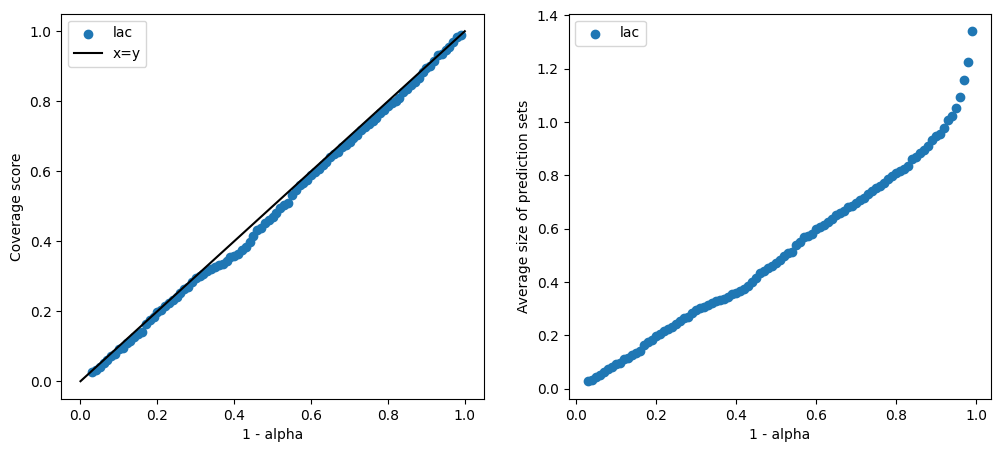

,alpha,coverages,widths
0,0.01,0.9900,1.3405
1,0.02,0.9825,1.2245
2,0.03,0.9705,1.1570
3,0.04,0.9555,1.0930
4,0.05,0.9475,1.0535
5,0.06,0.9360,1.0225
6,0.07,0.9310,1.0070
7,0.08,0.9145,0.9785
8,0.09,0.9005,0.9565
9,0.10,0.8950,0.9475


In [52]:
from mapie.metrics import classification_coverage_score, classification_mean_width_score
import numpy as np
import matplotlib.pyplot as plt

# Tính toán MAPIE với các giá trị alpha
alpha2 = np.arange(0.01, 0.98, 0.01)
_, y_ps_score2 = mapie_clf.predict(X_test, alpha=alpha2)

# Tính toán classification_coverage_score và classification_mean_width_score cho các alpha
coverages_score = [
    classification_coverage_score(y_test, y_ps_score2[:, :, i])
    for i, _ in enumerate(alpha2)
]
widths_score = [
    classification_mean_width_score(y_ps_score2[:, :, i])
    for i, _ in enumerate(alpha2)
]

# Vẽ đồ thị so sánh coverage và width cho các alpha
def plot_coverages_widths(alpha, coverage, width, method):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Đồ thị Coverage
    axs[0].scatter(1 - alpha, coverage, label=method)
    axs[0].set_xlabel("1 - alpha")
    axs[0].set_ylabel("Coverage score")
    axs[0].plot([0, 1], [0, 1], label="x=y", color="black")
    axs[0].legend()

    # Đồ thị Width
    axs[1].scatter(1 - alpha, width, label=method)
    axs[1].set_xlabel("1 - alpha")
    axs[1].set_ylabel("Average size of prediction sets")
    axs[1].legend()

    plt.show()

# Vẽ đồ thị
plot_coverages_widths(alpha2, coverages_score, widths_score, "lac")

# Tạo dataframe để hiển thị kết quả
results = pd.DataFrame()
results['alpha'] = alpha2
results['coverages'] = coverages_score
results['widths'] = widths_score

# Hiển thị 10 dòng đầu tiên
results.head(20)




---


- **Mục đích của biểu 1 trên là để** : Đo mức độ mà prediction set thực tế bao phủ đúng nhãn thật so với độ tin cậy kỳ vọng của người dùng.

 •	Mô hình được calibrate rất tốt: coverage thực tế ≈ độ tin cậy đặt ra.
 •	Không bị quá tự tin (coverage < kỳ vọng) hay quá dè chừng (coverage >> kỳ vọng).
 •	Đây là dấu hiệu mô hình có thể được dùng an toàn trong hệ thống thực tế mà không cần tuning thêm.


---

- **Mục đích của biểu đồ 2** này giup ta đo mức độ “rộng” của tập dự đoán khi ta yêu cầu mô hình có độ tin cậy cao hơn.
Ta thấy rằng
 -	Prediction set có kích thước trung bình tăng tuyến tính và hợp lý theo yêu cầu độ tin cậy.
 -	Ở độ tin cậy thấp khiến prediction set nhỏ (≈ 1 nhãn), phù hợp để tự động hóa
 -	Ở độ tin cậy cao dẫn đến prediction set mở rộng từ từ và đảm bảo không bỏ sót nhưng vẫn giữ tính cụ thể cao

  Cho thấy mô hình rất “tự tin khi nên” và “cẩn thận khi cần” → cực kỳ thích hợp để đưa vào các pipeline có yếu tố quyết định tự động + kiểm soát rủi ro.

---

- Tiếp đến chúng tôi quan sát bảng thống kê thông số của alpha, coverage, width để chọn ra alpha phù hợp nhất. Mục tiêu là cân bằng giữa coverage với width theo alpha

- Tức là coverages sẽ sát với 1-alpha (độ tin cậy). Lúc này mô hình đạt đúng mức độ tin cậy kỳ vọng. Không overconfident (nguy hiểm), cũng không quá dè chừng (thiếu hiệu quả).
Width càng gần 1 càng tốt. Vì trong trường hợp Width = 1 thì Prediction set chỉ chứa đúng 1 nhãn duy nhất, và nhãn đó chính là nhãn đúng.

- Để tìm ra điểm trade-off hợp lí. Tức là điểm mà mô hình dự đoán đúng nhiều nhất và trả lại ít hồ sơ cần người dung phải tự xem xét nhất có thể tức là nó trả về nhiều set có nhiều giá trị.







In [40]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=results)

https://docs.google.com/spreadsheets/d/1mrQ492ErqdmmzaSfQ2LxvKkb9ANrv-l8uUg39qUkmQY/edit#gid=0


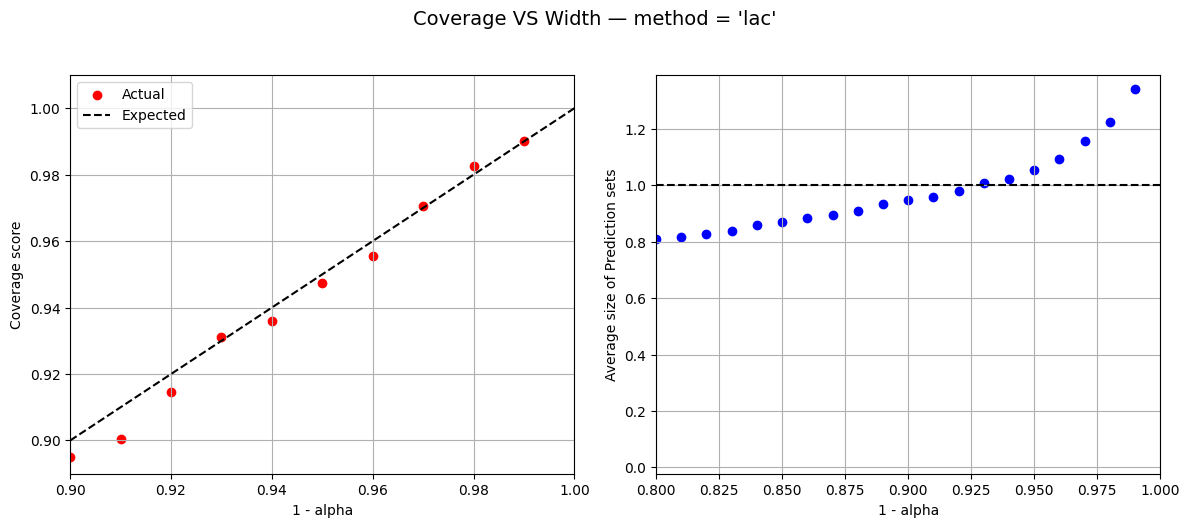

In [53]:
def plot_coverages_widths(alpha, coverage, width, method):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5.5))

    # Plot Coverage
    x_values = 1 - alpha
    axs[0].scatter(x_values, coverage, color='red', label='Actual')
    axs[0].plot([0.9, 1], [0.9, 1], color='black', linestyle='--', label='Expected')
    axs[0].set_xlim(0.9, 1)
    axs[0].set_ylim(0.89, 1.01)
    axs[0].set_xlabel("1 - alpha")
    axs[0].set_ylabel("Coverage score")
    axs[0].grid(True)
    axs[0].legend()

    # Plot Width
    y_min = min(width) - 0.05
    y_max = max(width) + 0.05
    axs[1].scatter(x_values, width, color='blue')
    axs[1].axhline(y=1, color='black', linestyle='--')
    axs[1].set_xlim(0.8, 1)
    axs[1].set_ylim(y_min, y_max)
    axs[1].set_xlabel("1 - alpha")
    axs[1].set_ylabel("Average size of Prediction sets")
    axs[1].grid(True)

    plt.suptitle(f"Coverage VS Width — {method}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # để suptitle không đè lên
    plt.show()

plot_coverages_widths(alpha2, coverages_score, widths_score, "method = 'lac'")

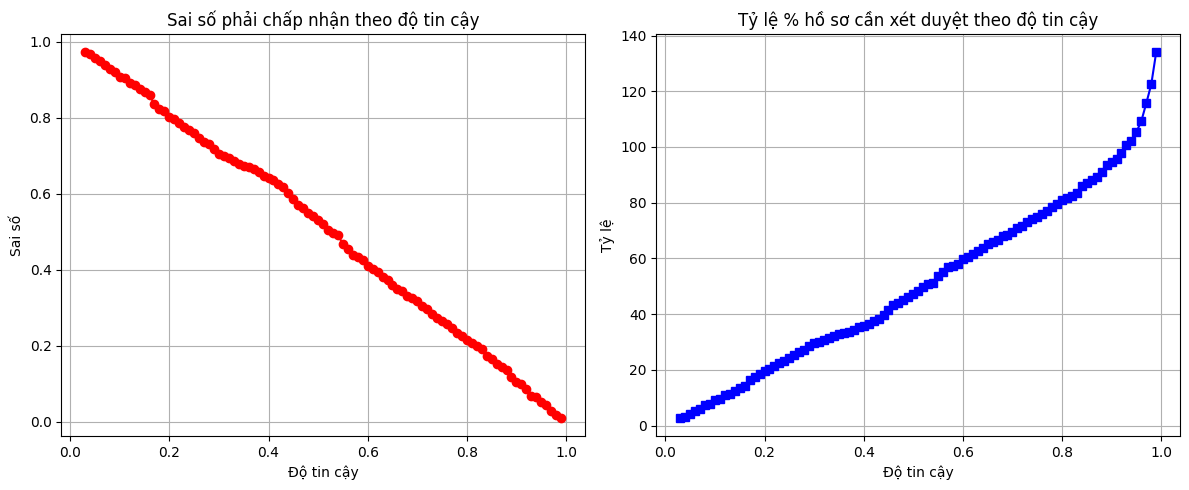

In [54]:
# Chuẩn bị dữ liệu
results['1 - alpha'] = 1 - results['alpha']
results['1 - coverage'] = 1 - results['coverages']
results['review_rate_from_width_%'] = np.abs(1 - results['widths']) * 100
#results['review_rate_from_width_%'] = results['widths'] * 100

# Tạo figure 2 subplot ngang nhau
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Đồ thị sai số phải chấp nhận
axs[0].plot(results['1 - alpha'], results['1 - coverage'], marker='o', color='red')
axs[0].set_xlabel('Độ tin cậy')
axs[0].set_ylabel('Sai số')
axs[0].set_title('Sai số phải chấp nhận theo độ tin cậy')
axs[0].grid(True)

# Subplot 2: Đồ thị tỷ lệ hồ sơ cần xét duyệt
axs[1].plot(results['1 - alpha'], results['widths'] * 100, marker='s', color='blue')
axs[1].set_xlabel('Độ tin cậy')
axs[1].set_ylabel('Tỷ lệ')
axs[1].set_title('Tỷ lệ % hồ sơ cần xét duyệt theo độ tin cậy')
axs[1].grid(True)

# Ghép lại và hiển thị
plt.tight_layout()
plt.show()

##  Phân tích biểu đồ: Mối quan hệ giữa độ tin cậy, sai số và khả năng tự động hóa

Hai biểu đồ dưới đây minh họa rõ ràng **mối quan hệ trade-off** giữa **độ tin cậy yêu cầu của mô hình (1 - alpha)** với hai yếu tố quan trọng:  
- **Sai số thực tế (1 - coverage)**  
- **Tỷ lệ hồ sơ cần xét duyệt lại (dựa trên prediction set width)**

---

### 🔴 Biểu đồ trái: Sai số phải chấp nhận theo độ tin cậy

- **Trục X**: Độ tin cậy yêu cầu (1 - alpha)
- **Trục Y**: Sai số thực tế (1 - coverage)

Biểu đồ thể hiện mối quan hệ nghịch biến gần tuyến tính:  
> Khi **độ tin cậy tăng**, **sai số giảm dần**  
→ Cho thấy mô hình được **calibrate tốt**, hoạt động ổn định.

---

### 🔵 Biểu đồ phải: Tỷ lệ hồ sơ cần xét duyệt theo độ tin cậy

- **Trục X**: Độ tin cậy yêu cầu (1 - alpha)
- **Trục Y**: % hồ sơ cần xét duyệt thủ công (do prediction set mở rộng)

Khi độ tin cậy càng cao, prediction set càng rộng → hệ thống **khó tự động hóa** → **nhiều hồ sơ phải xét lại**.

Ở mức tin cậy gần 1.0, tỷ lệ xét duyệt thậm chí vượt 100%, cho thấy:
- Nhiều hồ sơ có prediction set chứa nhiều class
- Hoặc hệ thống đánh giá lại nhiều lần để đảm bảo độ tin cậy

---

###  Kết luận

Hai biểu đồ thể hiện rõ **đặc trưng của bài toán kiểm soát độ tin cậy bằng MAPIE**:

| Tăng độ tin cậy | ↓ Sai số (tốt) | ↑ Chi phí xử lý (xấu) |
|-----------------|----------------|------------------------|

Đây là **trade-off không thể tránh**, và người thiết kế hệ thống cần:
- Xác định ngưỡng độ tin cậy phù hợp
- Dựa theo mục tiêu: an toàn vs. hiệu suất

---

###  Khuyến nghị triển khai

> Trong thực tế, ngưỡng độ tin cậy tối ưu thường nằm trong khoảng `0.90 – 0.95`, đảm bảo:
> - Coverage cao vừa đủ
> - Tỷ lệ xét duyệt vẫn ở mức thấp, tối ưu hiệu năng hệ thống

---



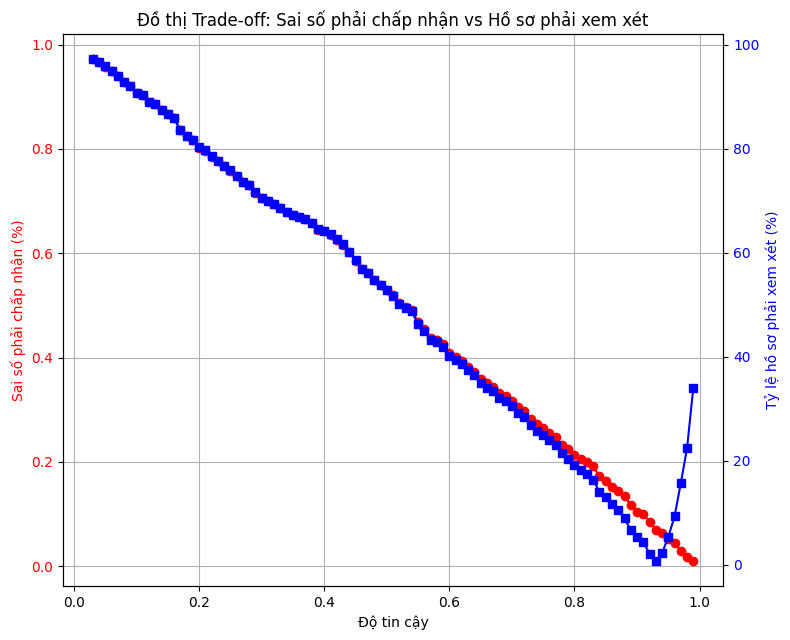

In [55]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 6.5))

# Trục Y bên trái (Sai số)
ax1.plot(results['1 - alpha'], results['1 - coverage'], marker='o', color='red', label='Sai số (1 - coverage)')
ax1.set_xlabel("Độ tin cậy")
ax1.set_ylabel("Sai số phải chấp nhận (%)", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True)

# Tạo trục Y bên phải
ax2 = ax1.twinx()

# Trục Y bên phải (Hồ sơ cần xét)
ax2.plot(results['1 - alpha'], results['review_rate_from_width_%'], marker='s', color='blue', label='Hồ sơ phải xem xét (%)')
ax2.set_ylabel("Tỷ lệ hồ sơ phải xem xét (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Đồ thị Trade-off: Sai số phải chấp nhận vs Hồ sơ phải xem xét")
fig.tight_layout()
plt.show()

##  Biểu đồ Trade-off: Sai số phải chấp nhận vs Tỷ lệ hồ sơ cần xét duyệt

Biểu đồ dưới đây thể hiện rõ **mối quan hệ đánh đổi (trade-off)** giữa:

- **Sai số phải chấp nhận (1 - coverage)** – biểu diễn bằng đường **màu đỏ**
- **Tỷ lệ hồ sơ cần xét duyệt lại (%)** – biểu diễn bằng đường **màu xanh**

trong quá trình sử dụng **MAPIE** để kiểm soát độ tin cậy của hệ thống phân loại.

---

###  Trục trái – Sai số (1 - coverage)

- Khi độ tin cậy tăng từ `0.91` đến `0.99`, sai số giảm mạnh từ khoảng `10%` xuống còn gần `1%`.
- Điều này phản ánh đúng nguyên lý của mô hình conformal prediction:
  
  > **Tăng độ tin cậy (1 - alpha) → tăng coverage → giảm sai số**

- Đường giảm đều và mượt → cho thấy **mô hình đã được calibrate tốt**.

---

### 🔵 Trục phải – Tỷ lệ hồ sơ cần xét duyệt

- Ngược lại, khi yêu cầu mô hình chính xác hơn, prediction set phải được mở rộng để đảm bảo độ bao phủ cao hơn → số lượng hồ sơ không thể xử lý tự động tăng theo.
- Khi độ tin cậy > `0.97`, tỷ lệ cần xét duyệt tăng nhanh — vượt mốc **30%** tại `0.99`.

---

###  Phân tích các điểm đặc biệt

####  **1. Điểm giao giữa hai đường (~ độ tin cậy = 0.96)**

- Tại đây, sai số và tỷ lệ hồ sơ cần xét duyệt đều ≈ **4%**
- Đây là **điểm cân bằng lý tưởng** giữa độ chính xác và hiệu suất tự động hóa
- Là lựa chọn phù hợp cho hệ thống yêu cầu cả an toàn và tối ưu vận hành

---

####  **2. Điểm thấp nhất của đường xanh (~ độ tin cậy = 0.945 – 0.95)**

- Tỷ lệ hồ sơ cần xét duyệt thấp nhất ≈ **0.6%**  
- Gần như toàn bộ hồ sơ được xử lý tự động  
- Nhưng sai số vẫn khoảng 5.5% → phù hợp với các hệ thống cần tốc độ, không đòi hỏi quá khắt khe về độ chính xác

---

####  **3. Vùng tăng mạnh của đường xanh (sau 0.97)**

- Khi độ tin cậy vượt `0.97`, tỷ lệ xét duyệt tăng nhanh theo cấp số
- Từ `~8%` tại 0.97 → lên `~18%` tại 0.98 và `>30%` tại 0.99
- Đây là vùng **“over-cautious tipping point”**, nơi hệ thống phải hi sinh quá nhiều hiệu suất để đổi lấy mức tin cậy cao

---

####  **4. Đường đỏ giảm đều – dấu hiệu calibrate tốt**

- Sai số giảm gần tuyến tính theo độ tin cậy
- Cho thấy mô hình có năng lực kiểm soát độ không chắc chắn ổn định và hiệu quả

---

###  Kết luận tổng quát

Biểu đồ này không chỉ mô tả mối quan hệ giữa độ tin cậy và hiệu suất, mà còn giúp xác định các **mốc chiến lược quan trọng**:

| Mốc                         | Ý nghĩa                                                     |
|-----------------------------|-------------------------------------------------------------|
| ~0.95                       | Hiệu suất tự động cao nhất, sai số chấp nhận được (~5.5%)  |
| ~0.96                       | **Điểm cân bằng lý tưởng** giữa sai số và chi phí vận hành |
| >0.97                       | Vùng “mất kiểm soát” chi phí, không hiệu quả để mở rộng thêm |

---

###  Khuyến nghị triển khai

> Tùy vào đặc thù hệ thống:
> - Nếu cần **tự động hóa cao**, có thể chọn độ tin cậy khoảng `0.94 – 0.95`
> - Nếu yêu cầu **an toàn cao**, chọn `0.96 – 0.97`
> - Hạn chế vượt `0.98` nếu không thực sự cần thiết, vì chi phí sẽ tăng rất nhanh



In [56]:
# Tìm khoảng sai số phía - q - được cho phép bởi độ tin cậy
prob_calib = lgb_model.predict_proba(X_calib)[:, 1]                          # Dự báo xác suất class cho tập cal
nonconformity = 1 - np.where(y_calib == 1, prob_calib, 1 - prob_calib) # Sai số của mô hình - nonconformity scores: 1 - prob of true class

alpha = 0.05
q = np.quantile(nonconformity, 1 - alpha)                            # Sai số q là phân vị (= độ tin cậy) của phân phối nonconformity

# Tạo khoảng dự đoán cho tập test
prob_test = lgb_model.predict_proba(X_test)[:, 1]                          # Dự báo xác suất từng class 1 cho tập test
prob_lower = np.clip(prob_test - q, 0, 1)                            # Cộng trừ q - "sai số cho phép" vào 2 phía tạo khoảng tin cậy
prob_upper = np.clip(prob_test + q, 0, 1)

## Khái niệm: Cận trên và cận dưới trong dự đoán xác suất

Trong `MapieClassifier` (hoặc `MapieRegressor`), khi sử dụng các phương pháp như `"score"` hoặc `"cumulated_score"`, mô hình không chỉ trả về một xác suất duy nhất cho class 1, mà còn đưa ra một khoảng tin cậy dưới dạng:

- **Cận dưới (Lower bound)**: Là giá trị nhỏ nhất mà mô hình tin rằng xác suất thực sự có thể đạt được, với mức độ tin cậy nhất định.  
- **Cận trên (Upper bound)**: Là giá trị lớn nhất mà mô hình tin rằng xác suất sẽ không vượt quá.

Ta có:

$$
P(\text{Lower} \leq \hat{p} \leq \text{Upper}) \geq 1 - \alpha
$$

> Diễn giải: “Tôi không dám khẳng định xác suất là bao nhiêu chính xác, nhưng 95% khả năng nó nằm trong khoảng từ Lower đến Upper.”

---

## Ý nghĩa thực tế của từng cận

**1. Cận dưới (Lower bound):**
- Nếu gần 0 → mô hình chưa tự tin, dù dự đoán có vẻ cao.
- Nếu cao (ví dụ > 0.6) → mô hình rất chắc chắn rằng xác suất thực sự cao.

**2. Cận trên (Upper bound):**
- Nếu gần 1 → mô hình cho rằng khả năng là class 1 vẫn còn cao.
- Nếu nhỏ (ví dụ < 0.5) → mô hình gần như loại bỏ khả năng là class 1.

---

## Ví dụ minh họa thực tế

| Lower | Prob | Upper |
|-------|------|-------|
| 0.16  | 0.96 | 1.00  |

- Mô hình dự đoán xác suất class 1 là 96%.
- Nhưng vẫn cho rằng nó có thể thấp đến tận 16%.
- → Khoảng [0.16, 1.00] là rất rộng → độ chắc chắn thấp.

Nguyên nhân có thể do:
- Dữ liệu đầu vào không đại diện (out-of-distribution).
- Mô hình chưa đủ tự tin vì calibration chưa khớp.

---

## Trường hợp nguy hiểm

- Dự đoán: 0.90  
- Lower: 0.01  

→ Mô hình tưởng là chắc chắn nhưng thực ra đang đoán mò.

---

## Trường hợp an toàn

- Dự đoán: 0.90  
- Lower: 0.87  
- Upper: 0.94  

→ Mô hình không chỉ dự đoán cao, mà còn rất tự tin về khoảng đó.

---

## Tổng kết đánh giá cận

| Đặc điểm                  | Ý nghĩa                                           |
|---------------------------|---------------------------------------------------|
| Lower tăng                | Mô hình tự tin hơn với xác suất cao              |
| Upper giảm                | Mô hình loại trừ khả năng class 1                |
| Upper - Lower giảm        | Khoảng dự đoán hẹp → dự đoán chắc chắn           |
| Upper - Lower tăng        | Khoảng dự đoán rộng → độ tin cậy thấp hơn        |

---

## MAPIE tính cận trên và dưới như thế nào?

### Bước 1: Tính xác suất trên tập calibration (`X_cal`)

Gọi:
- ^Pi: xác suất dự đoán class 1 của mẫu \( i \)  
- \( y_i \): nhãn thật của mẫu \( i \)

---

### Bước 2: Tính conformity score

$$
s_i =
\begin{cases}
1 - \hat{p}_i, & \text{nếu } y_i = 1 \\
\hat{p}_i, & \text{nếu } y_i = 0
\end{cases}
$$

Score này cho biết mô hình đã sai lệch bao nhiêu so với thực tế.

---

### Bước 3: Tính quantile tương ứng với alpha

Với alpha = 0.05, ta tính:

$$
q_\alpha = \text{Quantile}_{1 - \alpha}(s_i)
$$

---

### Bước 4: Tính cận dưới và cận trên cho điểm test

Với xác suất dự đoán :

$$
\text{Lower} = \max(0, \hat{p}_{\text{test}} - q_\alpha)
$$

$$
\text{Upper} = \min(1, \hat{p}_{\text{test}} + q_\alpha)
$$

Điều này đảm bảo rằng, với xác suất ít nhất là \( 1 - \alpha \), giá trị thực của xác suất sẽ nằm trong khoảng trên.

---

## Ví dụ minh họa

Giả sử:
- \( alpha = 0.05 \)
- \( q_{0.05} = 0.15 \)
- \( q_test = 0.88 \)

Tính:

$$
\text{Lower} = 0.88 - 0.15 = 0.73
$$

$$
\text{Upper} = \min(1.00, 0.88 + 0.15) = 1.00
$$

→ Prediction interval: [0.73, 1.00]

---

## Kết luận

$$
\boxed{
\begin{aligned}
\text{Lower} &= \max(0, \hat{p}_{\text{test}} - q_\alpha) \\
\text{Upper} &= \min(1, \hat{p}_{\text{test}} + q_\alpha)
\end{aligned}
}
$$

Trong đó, \( q_\alpha \) là quantile của conformity scores từ tập calibration.


In [57]:
interval_df = pd.DataFrame({
    'y_test': y_test.values,
    'Prob Lower': np.round(prob_lower, 2),
    'Prob Class 1': np.round(prob_test, 2),
    'Prob Upper': np.round(prob_upper, 2),

})
display(interval_df.head(10))

,y_test,Prob Lower,Prob Class 1,Prob Upper
0,0,0.00,0.00,0.80
1,0,0.00,0.03,0.83
2,0,0.00,0.00,0.80
3,0,0.00,0.00,0.80
4,0,0.00,0.02,0.82
5,0,0.00,0.00,0.80
6,0,0.00,0.00,0.80
7,0,0.00,0.01,0.80
8,0,0.16,0.96,1.00
9,0,0.00,0.00,0.80


In [58]:
from mapie.classification import MapieClassifier
from mapie.metrics import (classification_coverage_score,
                           classification_mean_width_score)

# Mapie Classfier để train mô hình gốc trên tập cal để dự báo Prediction Set cho tập test
mapie_score = MapieClassifier(estimator=lgb_model, cv="prefit", method="lac")
mapie_score.fit(X_calib, y_calib)
_, y_pred_set = mapie_score.predict(X_test, alpha = alpha)

In [59]:
# Thêm kết quả pred set vào df ở trên
interval_df['Set'] = [set(np.where(row)[0]) for row in y_pred_set[:, :, 0]]
interval_df.head(20)

,y_test,Prob Lower,Prob Class 1,Prob Upper,Set
0,0,0.00,0.00,0.80,{0}
1,0,0.00,0.03,0.83,{0}
2,0,0.00,0.00,0.80,{0}
3,0,0.00,0.00,0.80,{0}
4,0,0.00,0.02,0.82,{0}
5,0,0.00,0.00,0.80,{0}
6,0,0.00,0.00,0.80,{0}
7,0,0.00,0.01,0.80,{0}
8,0,0.16,0.96,1.00,{1}
9,0,0.00,0.00,0.80,{0}


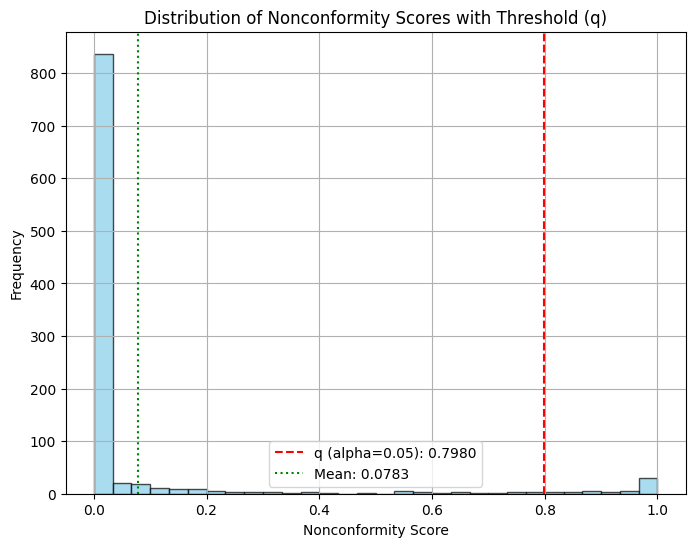

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử 'nonconformity' là mảng chứa giá trị sai số không tuân thủ của bạn
# Và 'q' là phân vị của sai số không tuân thủ
# Đoạn mã dưới vẽ đồ thị phân phối của nonconformity

plt.figure(figsize=(8, 6))

# Vẽ histogram phân phối của nonconformity
plt.hist(nonconformity, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Vẽ một dòng chỉ định phân vị q (độ tin cậy)
plt.axvline(x=q, color='red', linestyle='--', label=f"q (alpha={alpha}): {q:.4f}")

# Tùy chọn: Vẽ thêm các chỉ số (ví dụ: trung bình, phần trăm dưới q)
plt.axvline(x=np.mean(nonconformity), color='green', linestyle=':', label=f"Mean: {np.mean(nonconformity):.4f}")

# Cài đặt nhãn và tiêu đề
plt.xlabel('Nonconformity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Nonconformity Scores with Threshold (q)')
plt.legend()

plt.grid(True)
plt.show()


## 📊 Phân tích biểu đồ phân phối Nonconformity Score (kèm ngưỡng q)

### 1. Nonconformity Score là gì?

Nonconformity score (hay còn gọi là điểm không phù hợp) là một đại lượng đo **mức độ sai lệch của mô hình so với nhãn thực tế**.

Trong bài toán phân loại, nếu:
- ^P_yi : là xác suất mô hình gán cho class đúng \( y_i \)

Thì nonconformity score được tính là:

$$
s_i = 1 - \hat{p}_{y_i}
$$

Ý nghĩa:
- Nếu mô hình rất chắc chắn và đoán đúng → \( s_i \approx 0 \)
- Nếu mô hình đoán sai hoặc không tự tin → \( s_i \) sẽ lớn

| Giá trị \( s_i \)     | Ý nghĩa                                 |
|-----------------------|------------------------------------------|
| Gần 0                 | Mô hình dự đoán sát với nhãn đúng       |
| Gần 1                 | Mô hình dự đoán lệch xa, thiếu tự tin   |

MAPIE sẽ sử dụng tập các nonconformity scores từ dữ liệu calibration để tính ra **ngưỡng q** tương ứng với mức tin cậy người dùng yêu cầu (ví dụ 95%).

---

### 2. Ý nghĩa của biểu đồ

Biểu đồ thể hiện **phân phối của các Nonconformity Scores** thu được từ tập calibration. Trục tung thể hiện số lượng mẫu, còn trục hoành là giá trị score.

- **Đường xanh đứt đoạn (Mean)**:  
  Giá trị trung bình của nonconformity scores.  
  Trong biểu đồ trên: Mean ≈ 0.0783  
  → cho thấy phần lớn dự đoán khá sát nhãn thật.

- **Đường đỏ đứt đoạn (Threshold q)**:  
  Là ngưỡng quantile tại mức \( 1 - \alpha \), dùng để tạo prediction interval.  
  Với \( \alpha = 0.05 \), ta có:
  $$
  q = \text{Quantile}_{0.95}(s_i) \approx 0.7980
  $$

---

### 3. Nhận xét quan trọng

- **Phân phối lệch phải rõ rệt**:  
  Đa số các mẫu có score gần 0 → mô hình hoạt động tốt trên phần lớn dữ liệu.

- **Một số điểm có score cao bất thường (gần 1)**:  
  Cho thấy mô hình đoán rất tệ trên vài mẫu — có thể do outlier hoặc dữ liệu khó học.

- **Giá trị q khá lớn (0.7980)**:  
  → Để đạt độ tin cậy 95%, MAPIE phải mở prediction interval rất rộng.  
  Điều này phản ánh sự hiện diện của **một lượng nhỏ outlier**, kéo quantile lên.

---

### 4. Kết luận

Biểu đồ phân phối nonconformity score là công cụ trực quan giúp:

- Đánh giá độ tin cậy tổng thể của mô hình
- Phát hiện các điểm dữ liệu bất thường
- Hiểu rõ lý do tại sao prediction interval của MAPIE lại rộng/hẹp

Trong thực tế, việc kiểm soát phân phối nonconformity là bước thiết yếu để đảm bảo rằng **prediction interval được tạo ra không quá hẹp (kém tin cậy) hoặc quá rộng (thiếu tính thực dụng)**.
